# 线性多步法
## 基于数值积分插值的方法: Adams (外插)公式
$$y _ { k + 1 } = y _ { k } + h \sum _ { i = 0 } ^ { n - 1 } \beta _ { i } * f(x_{k-i}, y_{k-i})$$

+ Adams内插公式比外插公式多了一项, 将 $f_{k-i}$ 改为 $f_{k+1-i}$

其中$h = x _ { k + 1 } - x _ { k } , \beta _ { i } = \frac { 1 } { h } \int _ { x _ { k } } ^ { x _ { k + 1 }  } l _ { i (n - 1) } ( x ) d x$

## 常用公式(四阶)
$$y _ { k + 1 } = y _ { k } + \frac { h } { 24 } ( 55 f _ { k } - 59 f _ { k - 1 } + 37 f _ { k - 2 } - 9 f _ { k - 3 } )$$

$$y _ { k + 1 } = y _ { k } + \frac { h } { 24 } ( 9 f _ { k + 1 } + 19 f _ { k } - 5 f _ { k - 1 } + f _ { k - 2 } )$$

In [1]:


def k1(x, y, f):
    return f(x, y)


def k2(x, y, h, k, f):
    return f(x + 1 / 2 * h, y + h * 1 / 2 * k)


def k3(x, y, h, k, f):
    return f(x + 1 / 2 * h, y + h * 1 / 2 * k)


def k4(x, y, h, k, f):
    return f(x + h, y + h * k)


def k_n(x, y, h, f):
    k_1 = k1(x, y, f)
    k_2 = k2(x, y, h, k_1, f)
    k_3 = k3(x, y, h, k_2, f)
    k_4 = k4(x, y, h, k_3, f)
    return k_1, k_2, k_3, k_4


def runge_kutta(x, y, b, h, f, k=-1):
    xlist = [x]
    ylist = [y]
    flist = [f(x, y)]
    i = 0
    while True:
        if x >= b or i >= k:
            break
        k_1, k_2, k_3, k_4 = k_n(x, y, h, f)
        y = y + h * 1 / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
        x = x + h
        xlist.append(x)
        ylist.append(y)
        flist.append(f(x, y))
        i += 1
    return xlist, ylist, flist


def adams(x, y, b, h, f, k=4):
    # 通过单步法获取f0,f1,f2,f3的值, 以及此时的x和y
    xlist, ylist, flist = runge_kutta(x, y, b, h, f, k)
    x = xlist[-1]
    y = ylist[-1]
    while True:
        if x > b:
            break

        y = y + h * 1 / 24 * (55 * flist[-1] - 59 * flist[-2] + 37 * flist[-3] - 9 * flist[-4])
        x = x + h
        flist.append(f(x, y))
        xlist.append(x)
        ylist.append(y)
    return xlist, ylist, flist

In [2]:
def y_grad(x, y):
    return x + y


x0 = 0
y0 = 1
b = 0.5
h = 0.1
f = y_grad
xlist, ylist, flist = adams(x0, y0, b, h, f)

In [4]:
xlist

[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6]

In [5]:
ylist

[1,
 1.1103416666666666,
 1.2428051417013888,
 1.3997169941250753,
 1.5836484801613713,
 1.7974321426549018,
 2.04421460108746]

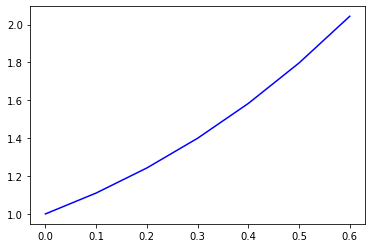

In [3]:
import matplotlib.pyplot as plt

plt.plot(xlist, ylist, 'b-')

plt.show()